# Laboratório de Simulações Numéricas (PME3201)

Resolução da sexta e última lista de exercícios com os códigos das simulações feitas a partir das equações obtidas, referentes à Dinâmica do Corpo Rígido.

##### Lucas Carvalho
##### Gustavo Bomer
##### Enzo Patrus

Engenharia Mecânica, 1 de Dezembro de 2023

### Configuração do Ambiente e Bibliotecas

Importação das principais biblitoecas que vão ser utilizadas no desenvolvimento da tarefa.

- Numpy para os cálculso de álgebra linear
- Matplotlib para a criação de gráficos
- Scipy para utilizar os métodos de integração numérica



In [2]:
!pip install plotly --quiet

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from scipy.special import ellipj

## Descrição do Problema

Admitiremos que o corpo rígido tenha forma arbitrária, mas que esteja suspenso por uma suspensão Cardan (Figura abaixo), de modo tal que o seu centro de massa permaneça imóvel durante todo o tempo.

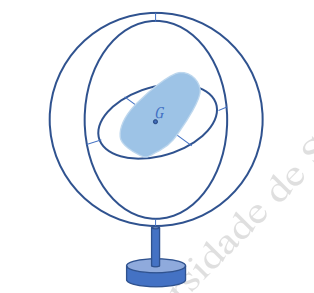

## 01) Primeiro Exercício


### a) Implementação da Função

In [4]:
def angular_velocity(t, z):
    p, q, r = z

    dp_dt = ((B - C)*q*r)/A

    dq_dt = ((C - A)*p*r)/B

    dr_dt = ((A - B)*p*q)/C

    return [dp_dt, dq_dt, dr_dt]

### b) Situação Específica

In [5]:
A = B = C = 3 # kg m^2

p_0 = [3, 4, 7]
q_0 = [2, 6, 8]
r_0 = [1, 1, 3]

# Condições iniciais para o cenário C1
z0 = list(zip(p_0, q_0, r_0))

# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol = []

for n in range(3):
    solution = solve_ivp(angular_velocity, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Agora, analisando graficamente

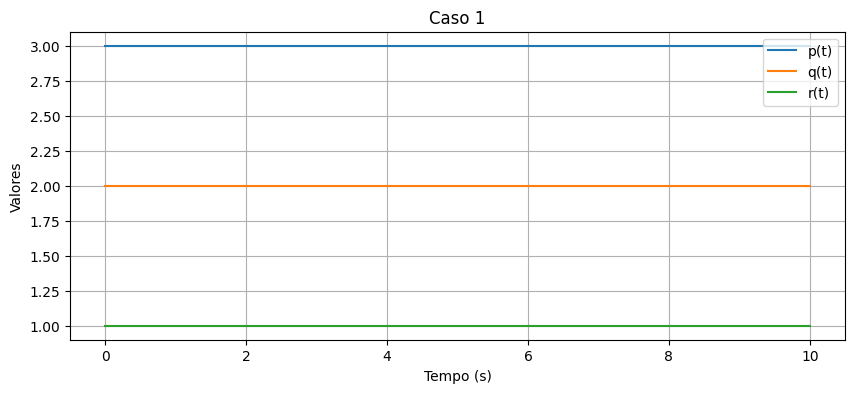

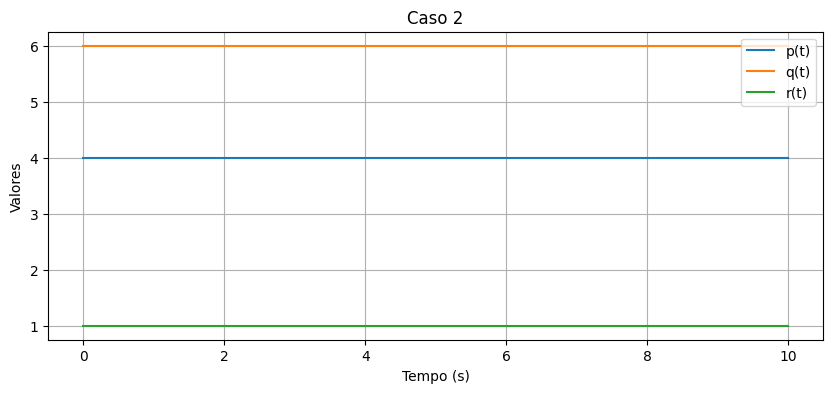

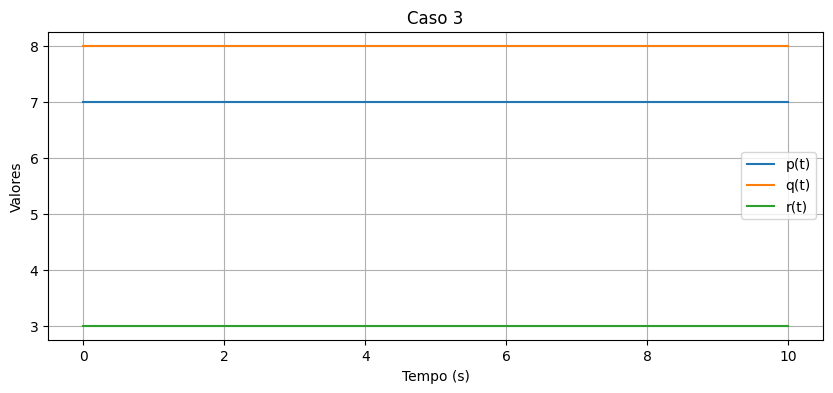

In [6]:
# Plotando os gráficos para cada caso
for n in range(3):
    plt.figure(figsize=(10, 4))

    plt.plot(sol[n].t, sol[n].y[0], label='p(t)')
    plt.plot(sol[n].t, sol[n].y[1], label='q(t)')
    plt.plot(sol[n].t, sol[n].y[2], label='r(t)')

    plt.title(f'Caso {n+1}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

## 2) Segundo Exercício

### a) Simulação

In [7]:
def angular_velocity_second_case(t, z):
    p, q, r = z

    dp_dt = ((A - C)*q*r)/A

    dq_dt = ((C - A)*p*r)/A

    dr_dt = 0

    return [dp_dt, dq_dt, dr_dt]

In [8]:
A = B = 3 # kg m^2
C = 6 # kg m^2

p_0 = [5, 0, 0, 3]
q_0 = [0, 5, 0, 1.5]
r_0 = [0, 0, 5, 8]

# Condições iniciais para o cenário C1
z0 = list(zip(p_0, q_0, r_0))

# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol = []

for n in range(4):
    solution = solve_ivp(angular_velocity_second_case, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Apresentando os gráficos

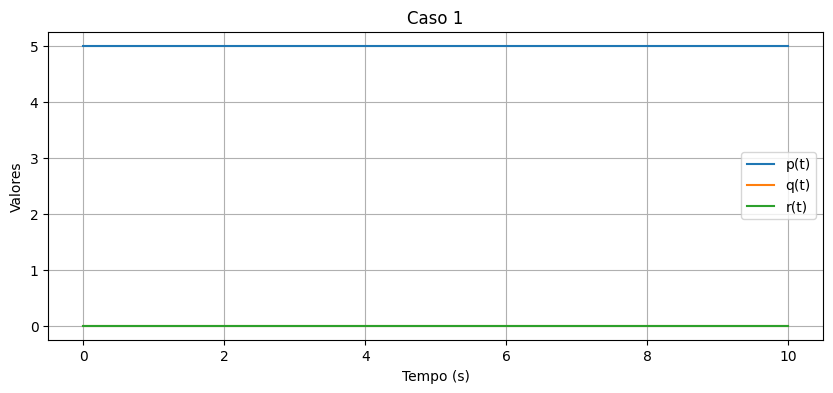

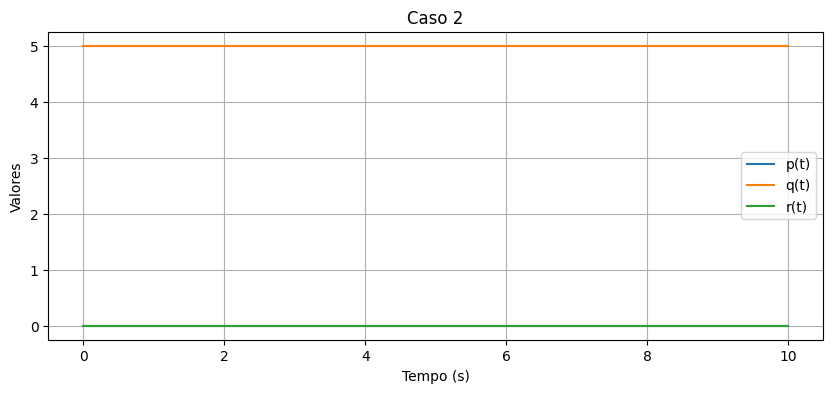

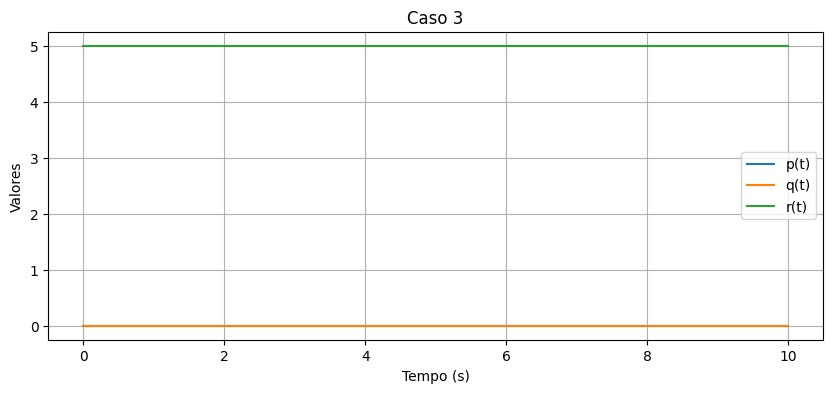

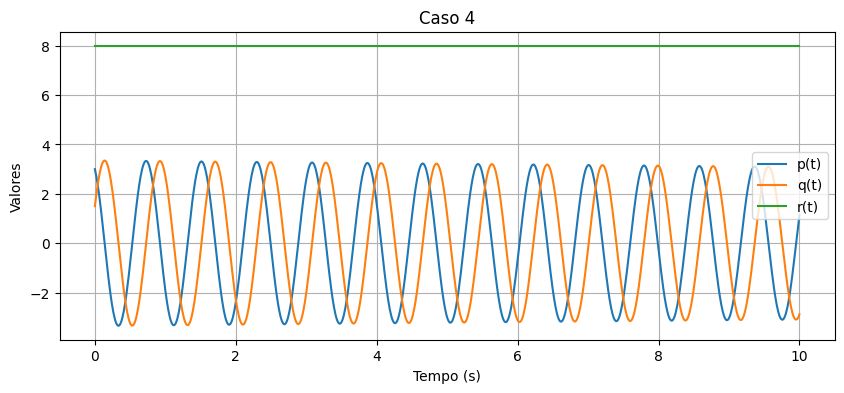

In [9]:
# Plotando os gráficos para cada caso
for n in range(4):
    plt.figure(figsize=(10, 4))

    plt.plot(sol[n].t, sol[n].y[0], label='p(t)')
    plt.plot(sol[n].t, sol[n].y[1], label='q(t)')
    plt.plot(sol[n].t, sol[n].y[2], label='r(t)')

    plt.title(f'Caso {n+1}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

### b) Demonstração Numérica

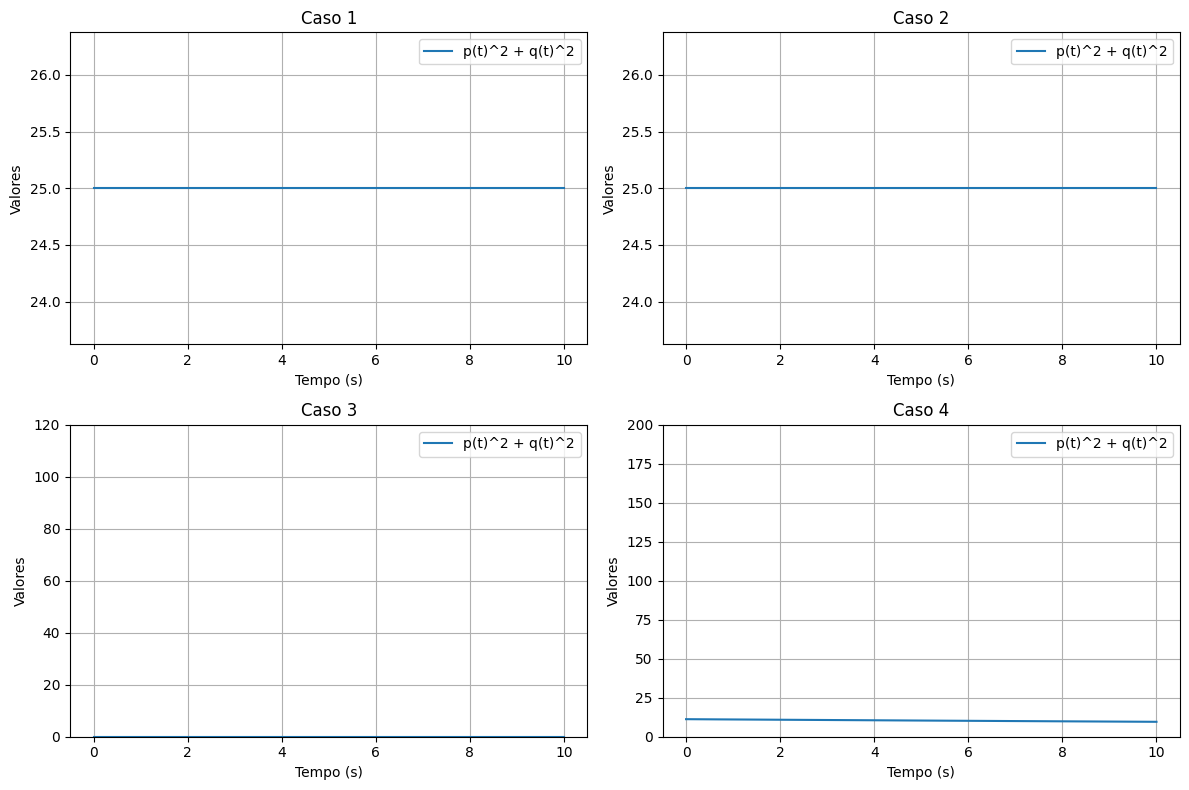

In [10]:
# Criando uma única figura
plt.figure(figsize=(12, 8))

# Plotando os gráficos para cada caso
for n in range(4):
    # Adicionando um pequeno valor (epsilon) ao denominador para evitar divisão por zero
    epsilon = 1e-10
    values = (sol[n].y[0]**2) + (sol[n].y[1]**2 + epsilon)

    # Definindo a posição do subplot na grade 2x2
    plt.subplot(2, 2, n+1)

    # Plotando o gráfico
    plt.plot(sol[n].t, values, label='p(t)^2 + q(t)^2')

    # Ajustando a escala para os casos 3 e 4
    if n == 2:
        plt.ylim(0, 120)  # Ajuste da escala para o caso 3
    elif n == 3:
        plt.ylim(0, 200)  # Ajuste da escala para o caso 4

    plt.title(f'Caso {n+1}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando a figura
plt.show()


### c) Ângulos Invariantes

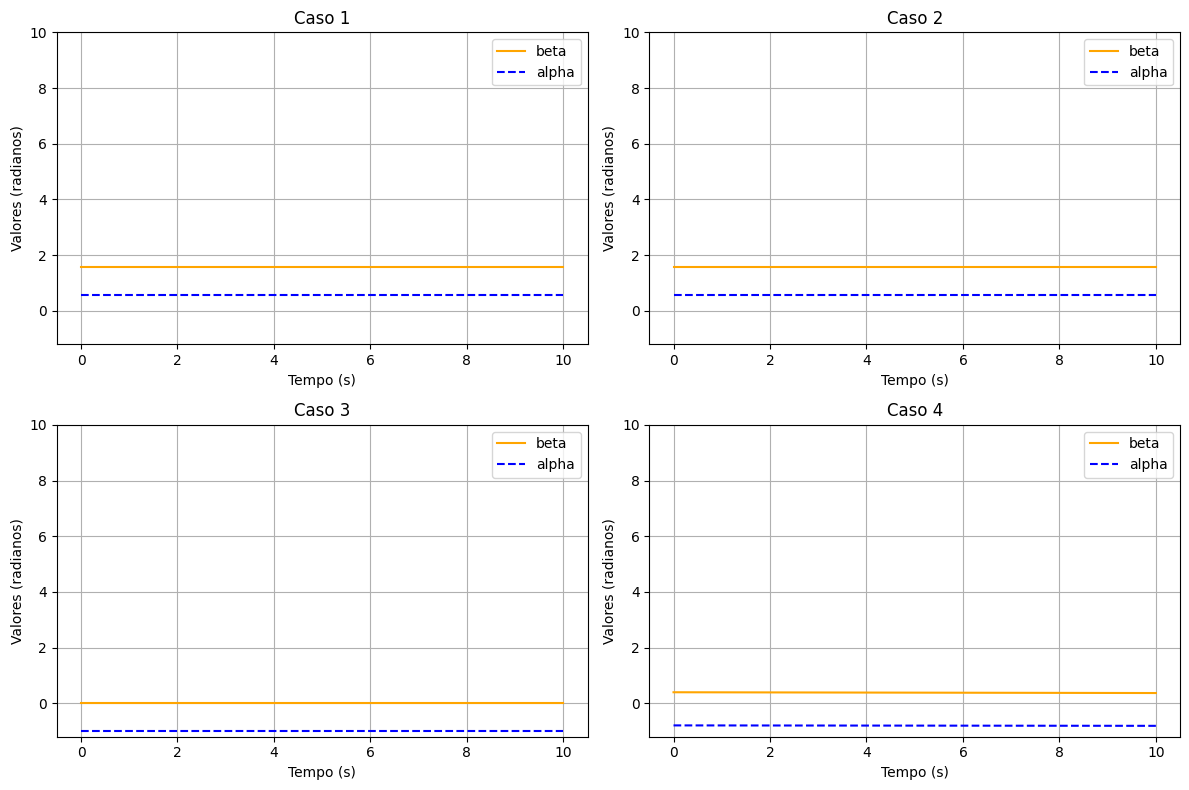

In [11]:
# Criando uma única figura com 2 linhas e 2 colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotando os gráficos para cada caso
for n in range(4):
    # Adicionando um epsilon muito pequeno para evitar a divisão por zero
    epsilon = 1e-10
    denom_alpha = C * sol[n].y[2] + epsilon
    denom_beta = sol[n].y[2] + epsilon

    # Calculando alpha e beta
    alpha_values = np.arctan2(A * np.sqrt(sol[n].y[0]**2 + sol[n].y[1]**2), denom_alpha)
    beta_values = np.arctan2(np.sqrt(sol[n].y[0]**2 + sol[n].y[1]**2), denom_beta)

    # Determinando a posição do subplot na matriz 2x2
    row = n // 2
    col = n % 2

    # Adicionando uma reta alpha abaixo da reta beta
    axs[row, col].plot(sol[n].t, beta_values, label='beta', color='orange')
    axs[row, col].plot(sol[n].t, alpha_values - 1, label='alpha', color='blue', linestyle='--')
    axs[row, col].set_ylim(-1.2, 10)  # Ajuste da escala para valores específicos

    axs[row, col].set_title(f'Caso {n+1}')
    axs[row, col].set_xlabel('Tempo (s)')
    axs[row, col].set_ylabel('Valores (radianos)')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Mostrando a figura
plt.show()


### d) Plano de Fase

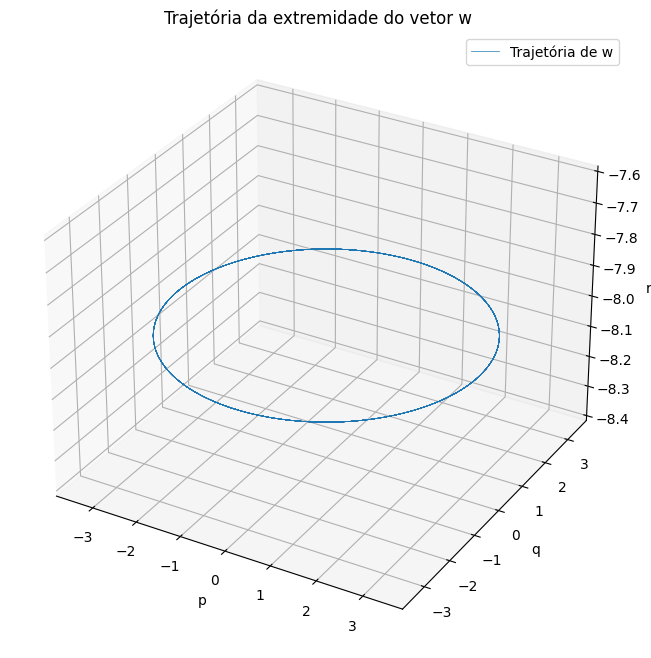

In [12]:
# Parâmetros iniciais
A = 3  # kgm*2
B = 3  # kgm*2
C = 6  # kgm*2

# Estados iniciais - Caso 4
p0 = 3
q0 = 1.5
r0 = 8

# Função que define as equações diferenciais
def corporigido(x, t):
    dx1 = (-(C - A) * x[1] * x[2]) / A
    dx2 = (-(A - C) * x[2] * x[0]) / B
    dx3 = 0
    return [dx1, dx2, dx3]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Apresentação gráfica dos resultados da simulação
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(p, q, r, label='Trajetória de w', linewidth=0.5)
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('r')
ax.set_title('Trajetória da extremidade do vetor w')
ax.legend()

# Exibição do gráfico
plt.show()

### e) Momento da Quantidade de Movimento

Tomar cuidado com o método de integração

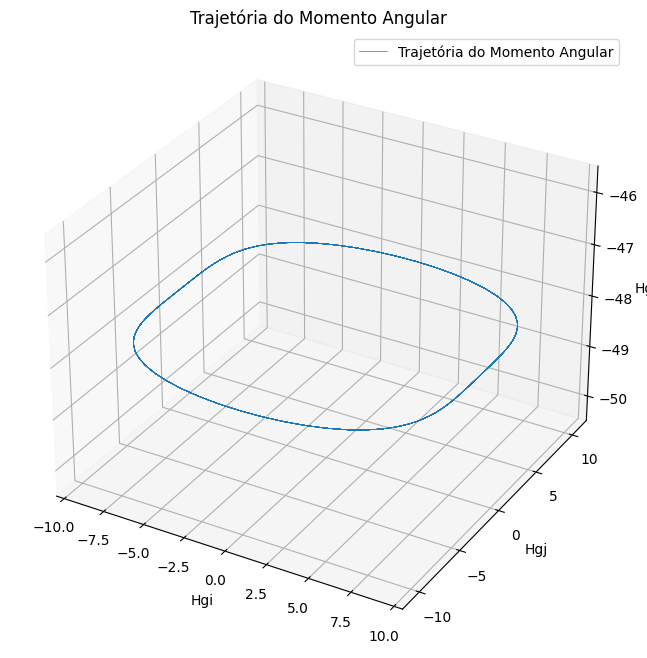

In [13]:
# Parâmetros iniciais
A = 3  # kgm*2
B = 3  # kgm*2
C = 6  # kgm*2

# Estados iniciais - Caso 4
p0 = 3
q0 = 1.5
r0 = 8

# Função que define as equações diferenciais
def corporigido(x, t):
    dx1 = (-(C - A) * x[1]**3) / A
    dx2 = (-(A - C) * x[2] * x[0]) / B
    dx3 = 0
    return [dx1, dx2, dx3]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Cálculo das componentes do momento angular
Hgi = A * p
Hgj = B * q
Hgk = C * r

# Apresentação gráfica dos resultados da simulação
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Hgi, Hgj, Hgk, label='Trajetória do Momento Angular', linewidth=0.5)
ax.set_xlabel('Hgi')
ax.set_ylabel('Hgj')
ax.set_zlabel('Hgk')
ax.set_title('Trajetória do Momento Angular')
ax.legend()

# Exibição do gráfico
plt.show()

### f) Último Cenário

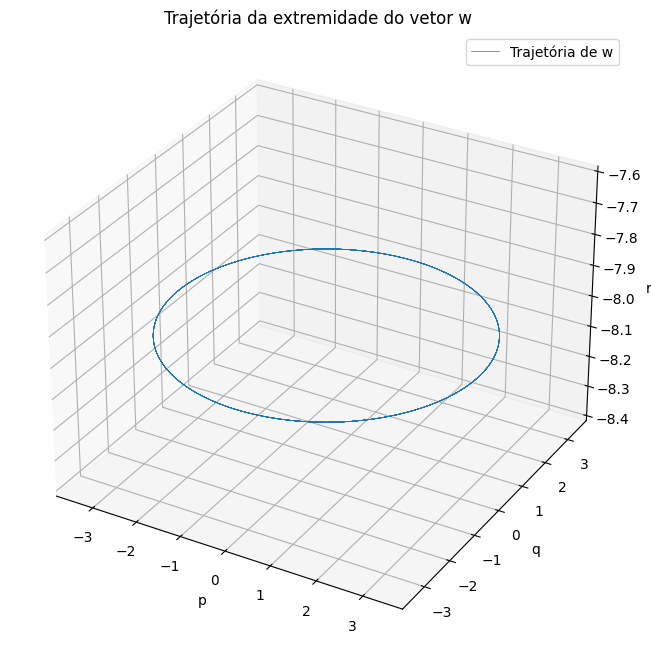

In [14]:
# Parâmetros iniciais
A = B = 6 # kgm*2
C = 3

# Estados iniciais - Caso 4
p0 = 3
q0 = 1.5
r0 = 8

# Função que define as equações diferenciais
def corporigido(x, t):
    dx1 = (-(C - A) * x[1] * x[2]) / A
    dx2 = (-(A - C) * x[2] * x[0]) / B
    dx3 = 0
    return [dx1, dx2, dx3]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Apresentação gráfica dos resultados da simulação
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(p, q, r, label='Trajetória de w', linewidth=0.5)
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('r')
ax.set_title('Trajetória da extremidade do vetor w')
ax.legend()

# Exibição do gráfico
plt.show()

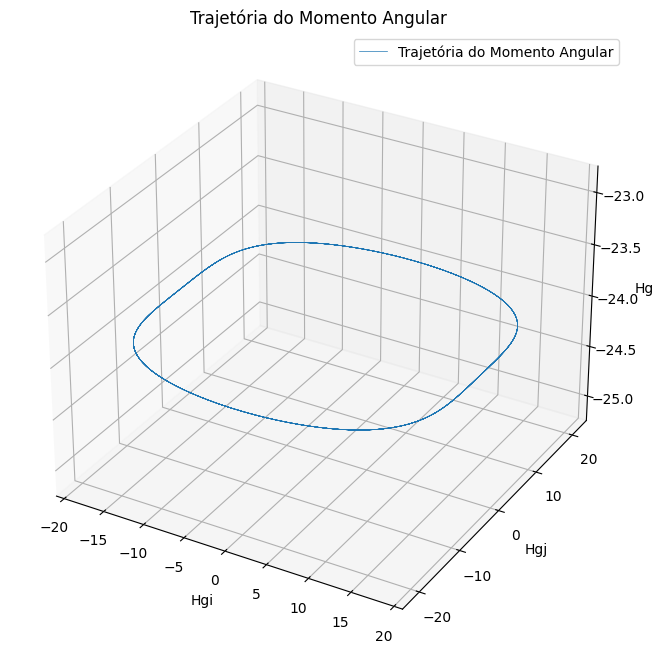

In [15]:
# Parâmetros iniciais
A = B = 6 # kgm*2
C = 3  # kgm*2

# Estados iniciais - Caso 4
p0 = 3
q0 = 1.5
r0 = 8

# Função que define as equações diferenciais
def corporigido(x, t):
    dx1 = (-(C - A) * x[1]**3) / A
    dx2 = (-(A - C) * x[2] * x[0]) / B
    dx3 = 0
    return [dx1, dx2, dx3]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Cálculo das componentes do momento angular
Hgi = A * p
Hgj = B * q
Hgk = C * r

# Apresentação gráfica dos resultados da simulação
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Hgi, Hgj, Hgk, label='Trajetória do Momento Angular', linewidth=0.5)
ax.set_xlabel('Hgi')
ax.set_ylabel('Hgj')
ax.set_zlabel('Hgk')
ax.set_title('Trajetória do Momento Angular')
ax.legend()

# Exibição do gráfico
plt.show()

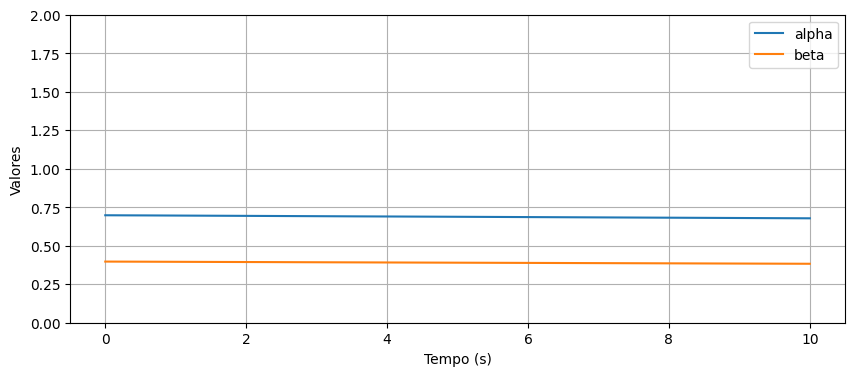

In [16]:
A = B = 6 # kg m^2
C = 3 # kg m^2

p_0 = [5, 0, 0, 3]
q_0 = [0, 5, 0, 1.5]
r_0 = [0, 0, 5, 8]

# Condições iniciais para o cenário C1
z0 = list(zip(p_0, q_0, r_0))

# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol = []

for n in range(4):
    solution = solve_ivp(angular_velocity_second_case, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

plt.figure(figsize=(10, 4))

plt.plot(sol[3].t, np.arctan(A*np.sqrt(sol[3].y[0]**2 + sol[3].y[1]**2)/(C*sol[3].y[2])), label='alpha')
plt.plot(sol[3].t, np.arctan(np.sqrt(sol[3].y[0]**2 + sol[3].y[1]**2)/(sol[3].y[2])), label='beta')
plt.ylim(0, 2)  # Ajuste da escala para valores maiores

plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

## 3) Terceiro Problema

### Simulações

In [17]:
A = 3 # kg m^2
B = 2 # kg m^2
C = 1 # kg m^2

p_0 = [5, 0, 0, 3]
q_0 = [0, 5, 0, 1.5]
r_0 = [0, 0, 5, 8]

# Condições iniciais para o cenário C1
z0 = list(zip(p_0, q_0, r_0))

# Tempo de simulação
t_span = [0, 10]  # de 0 a 10 segundos

# Realize a integração usando solve_ivp (M1) para o modelo não-linear
sol = []

for n in range(4):
    solution = solve_ivp(angular_velocity, t_span, z0[n], method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))
    sol.append(solution)  # Adicione o resultado ao final da lista sol

Em relação às velocidades angulares

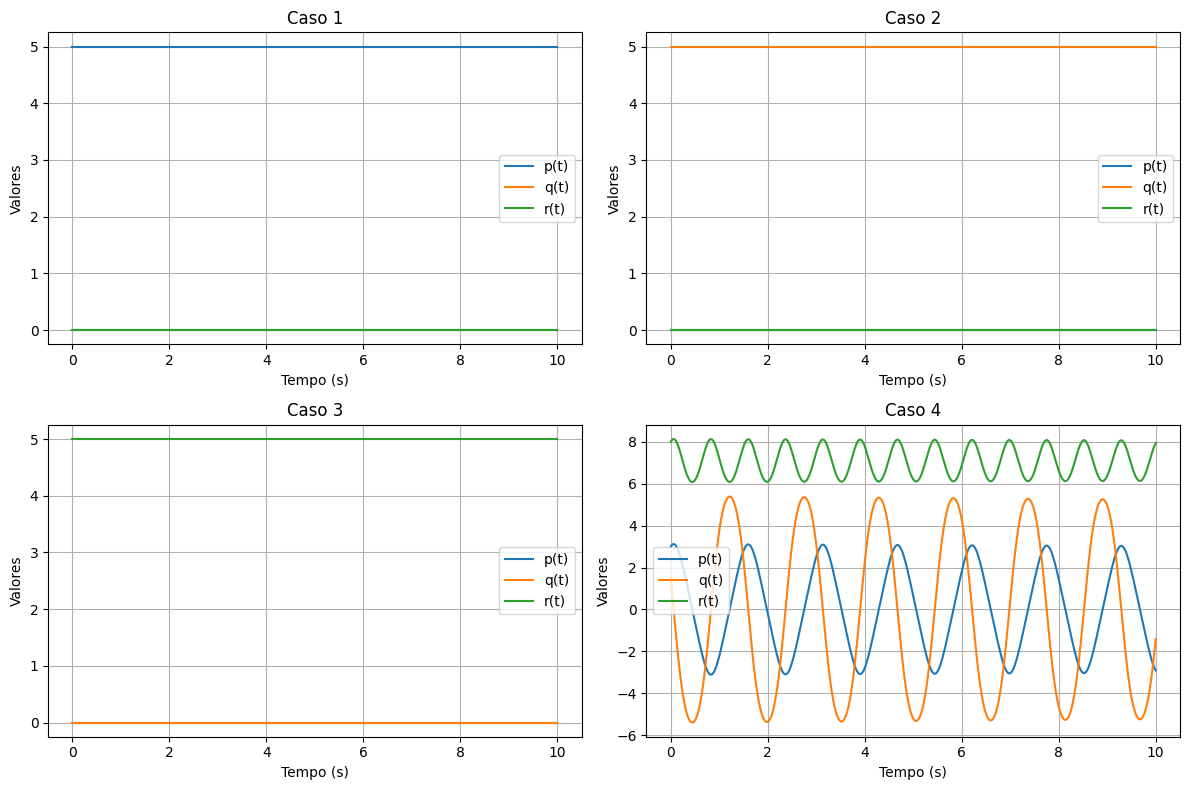

In [18]:
# Criando uma figura com duas linhas e duas colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterando sobre os casos e plotando os gráficos em cada posição do subplot
for n in range(4):
    row = n // 2  # Obtendo o número da linha
    col = n % 2   # Obtendo o número da coluna

    axs[row, col].plot(sol[n].t, sol[n].y[0], label='p(t)')
    axs[row, col].plot(sol[n].t, sol[n].y[1], label='q(t)')
    axs[row, col].plot(sol[n].t, sol[n].y[2], label='r(t)')

    axs[row, col].set_title(f'Caso {n+1}')
    axs[row, col].set_xlabel('Tempo (s)')
    axs[row, col].set_ylabel('Valores')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Ajustando o layout para evitar sobreposições
plt.tight_layout()

# Mostrando a figura
plt.show()

Para os momentos angulares

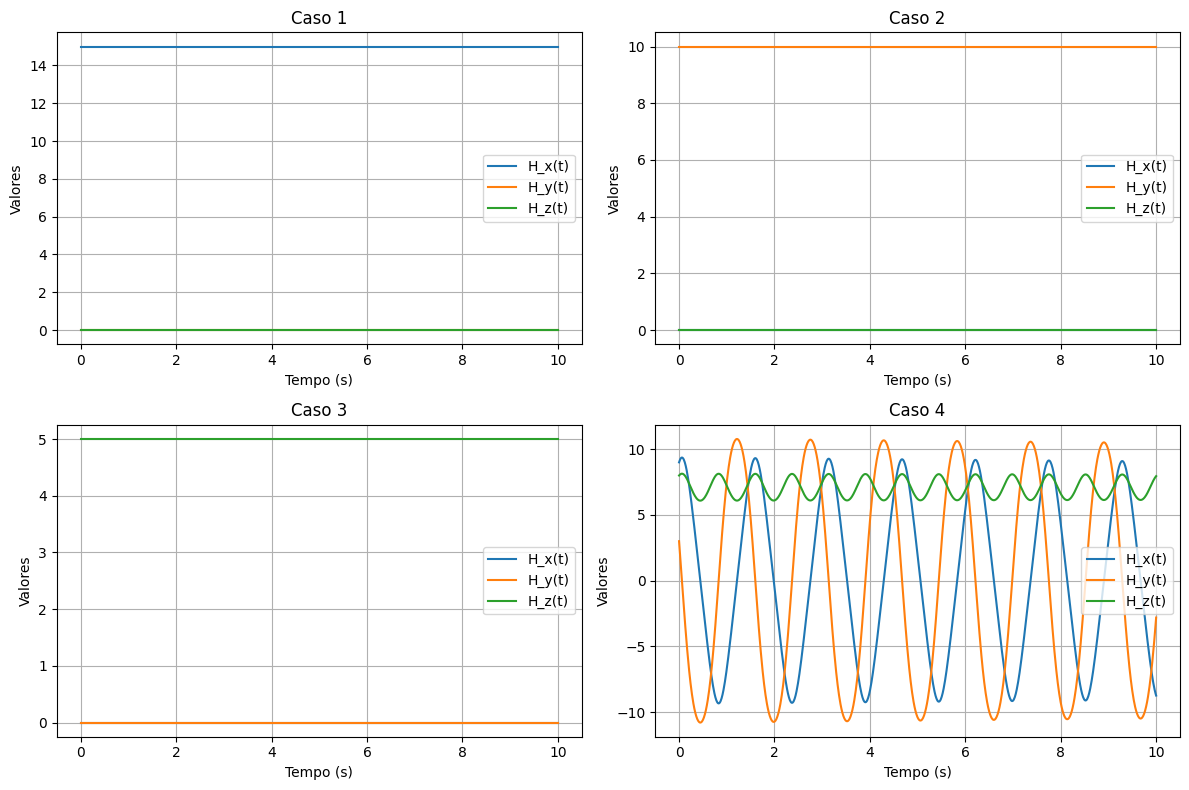

In [19]:
# Criando uma figura com duas linhas e duas colunas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterando sobre os casos e plotando os gráficos em cada posição do subplot
for n in range(4):
    row = n // 2  # Obtendo o número da linha
    col = n % 2   # Obtendo o número da coluna

    axs[row, col].plot(sol[n].t, sol[n].y[0] * A, label='H_x(t)')
    axs[row, col].plot(sol[n].t, sol[n].y[1] * B, label='H_y(t)')
    axs[row, col].plot(sol[n].t, sol[n].y[2] * C, label='H_z(t)')

    axs[row, col].set_title(f'Caso {n+1}')
    axs[row, col].set_xlabel('Tempo (s)')
    axs[row, col].set_ylabel('Valores')
    axs[row, col].legend()
    axs[row, col].grid(True)

# Ajustando o layout para evitar sobreposições
plt.tight_layout()

# Mostrando a figura
plt.show()

### b) Invariância da Energia e do Momento Angular

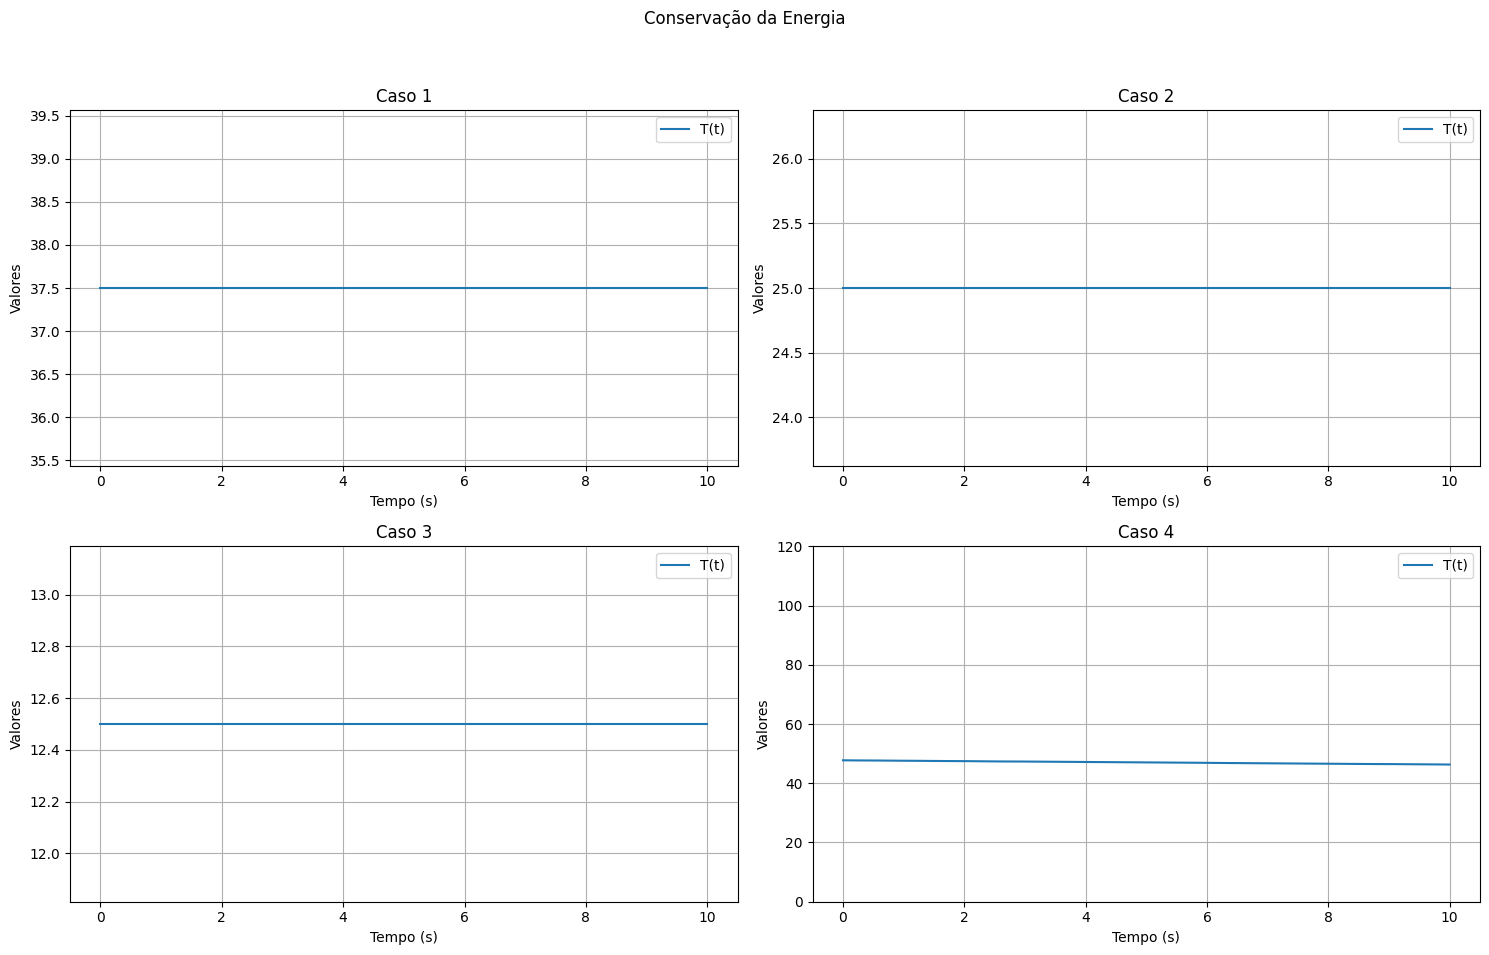

In [20]:
# Crie uma única figura para todos os gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Conservação da Energia')

# Plote cada gráfico nos eixos apropriados
for n, ax in enumerate(axes.flat):
    ax.plot(sol[n].t, 0.5*(A*(sol[n].y[0])**2 + B*(sol[n].y[1])**2 + C*(sol[n].y[2])**2), label='T(t)')

    if n == 3:
        ax.set_ylim(0, 120)  # Ajuste da escala para valores maiores

    ax.set_title(f'Caso {n+1}')
    ax.set(xlabel='Tempo (s)', ylabel='Valores')
    ax.legend()
    ax.grid(True)

# Ajuste o layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exiba a imagem combinada
plt.show()

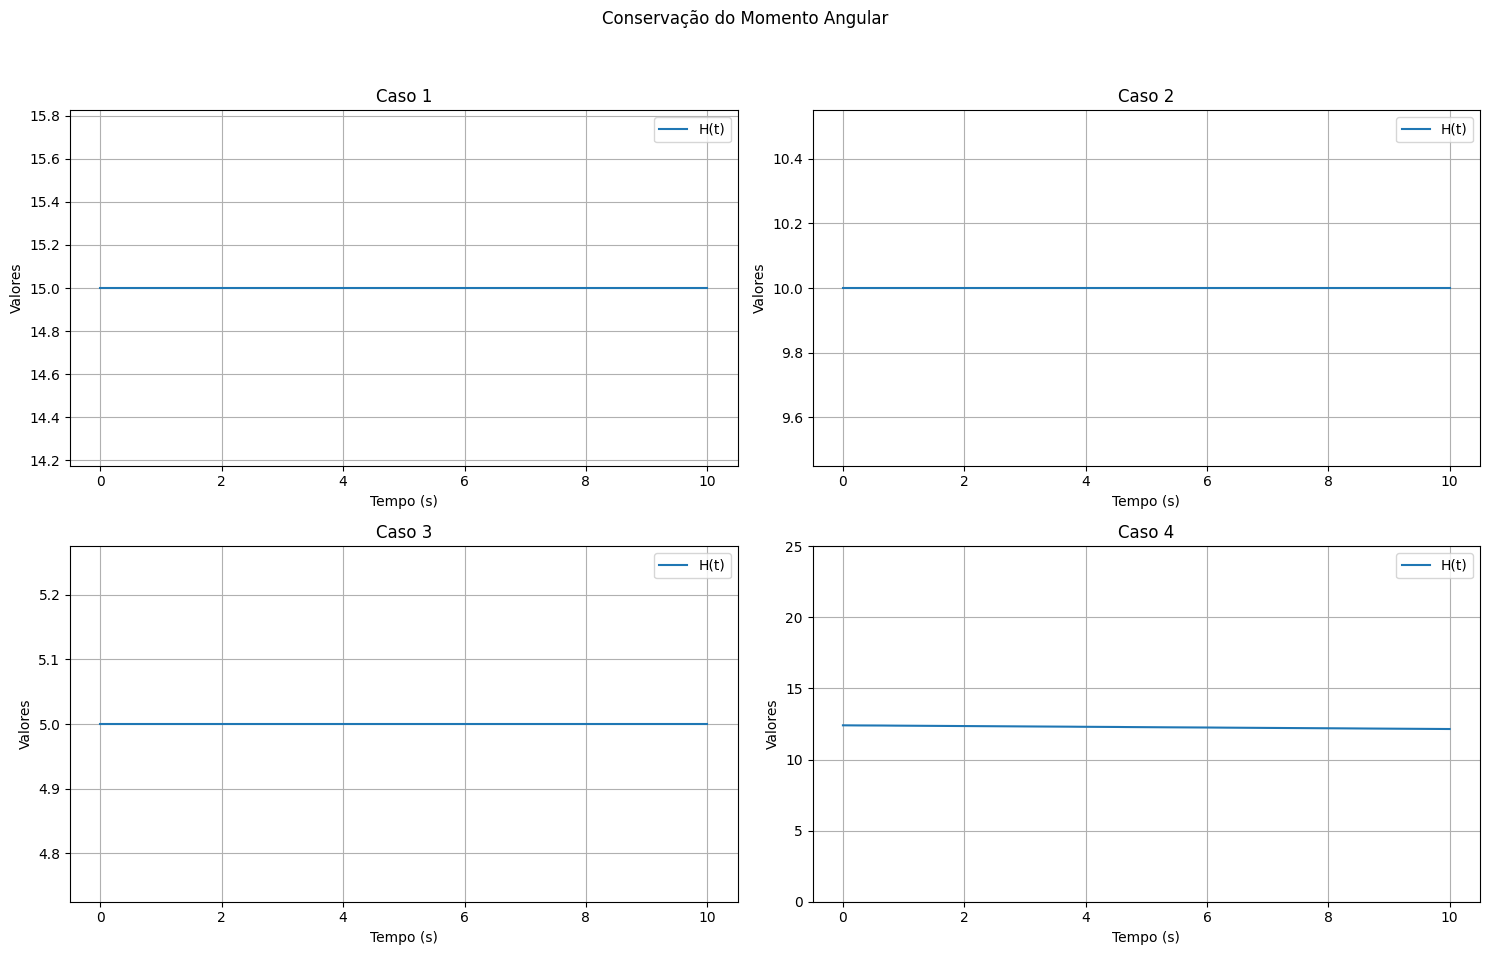

In [21]:
import matplotlib.pyplot as plt
import numpy as np  # Certifique-se de importar numpy se não estiver fazendo isso em seu código original

# Crie uma única figura para todos os gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Conservação do Momento Angular')

# Plote cada gráfico nos eixos apropriados
for n, ax in enumerate(axes.flat):
    ax.plot(sol[n].t, np.sqrt((A*sol[n].y[0])**2 + (B*sol[n].y[1])**2 + (C*sol[n].y[2])**2), label='H(t)')

    if n == 3:
        ax.set_ylim(0, 25)  # Ajuste da escala para valores maiores

    ax.set_title(f'Caso {n+1}')
    ax.set(xlabel='Tempo (s)', ylabel='Valores')
    ax.legend()
    ax.grid(True)

# Ajuste o layout para evitar sobreposição de rótulos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exiba a imagem combinada
plt.show()


### c) Demonstração da Estabilidade

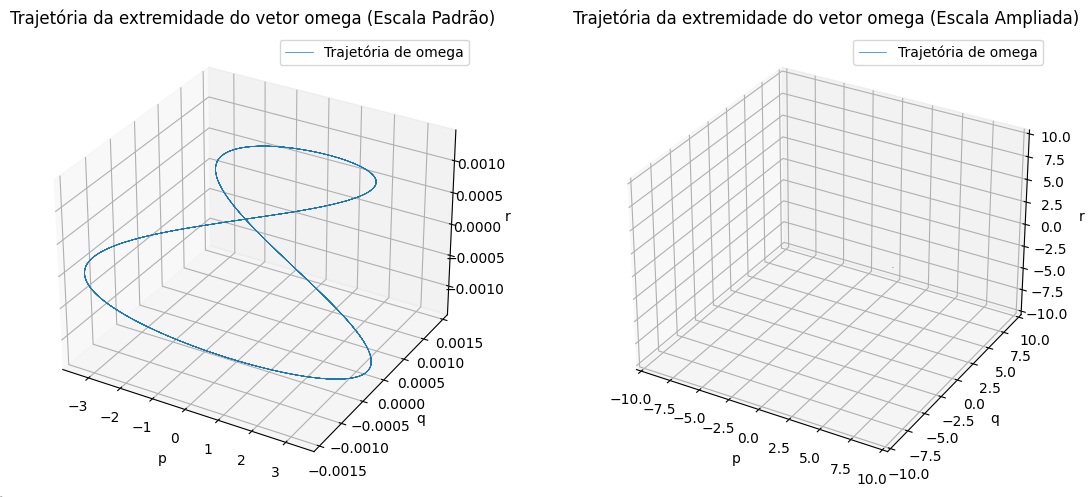

In [22]:
# Parâmetros iniciais
A = 3  # kgm*2
B = 2
C = 1

# Estados iniciais - Caso 4
p0 = 5
q0 = 0.001
r0 = 0.001

# Função que define as equações diferenciais
def corporigido(z, t):
    p, q, r = z

    dp_dt = ((B - C) * q * r) / A
    dq_dt = ((C - A) * p * r) / B
    dr_dt = ((A - B) * p * q) / C

    return [dp_dt, dq_dt, dr_dt]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Configuração do gráfico principal
fig = plt.figure(figsize=(12, 5))

# Gráfico 1: Escala padrão
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(p, q, r, label='Trajetória de omega', linewidth=0.5)
ax1.set_xlabel('p')
ax1.set_ylabel('q')
ax1.set_zlabel('r')
ax1.set_title('Trajetória da extremidade do vetor omega (Escala Padrão)')
ax1.legend()

# Gráfico 2: Escala ampliada
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(p, q, r, label='Trajetória de omega', linewidth=0.5)
ax2.set_xlabel('p')
ax2.set_ylabel('q')
ax2.set_zlabel('r')
ax2.set_title('Trajetória da extremidade do vetor omega (Escala Ampliada)')
ax2.legend()

# Ajuste de escala
ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 10])
ax2.set_zlim([-10, 10])


# Ajustar layout
plt.tight_layout()

# Exibição do gráfico
plt.show()

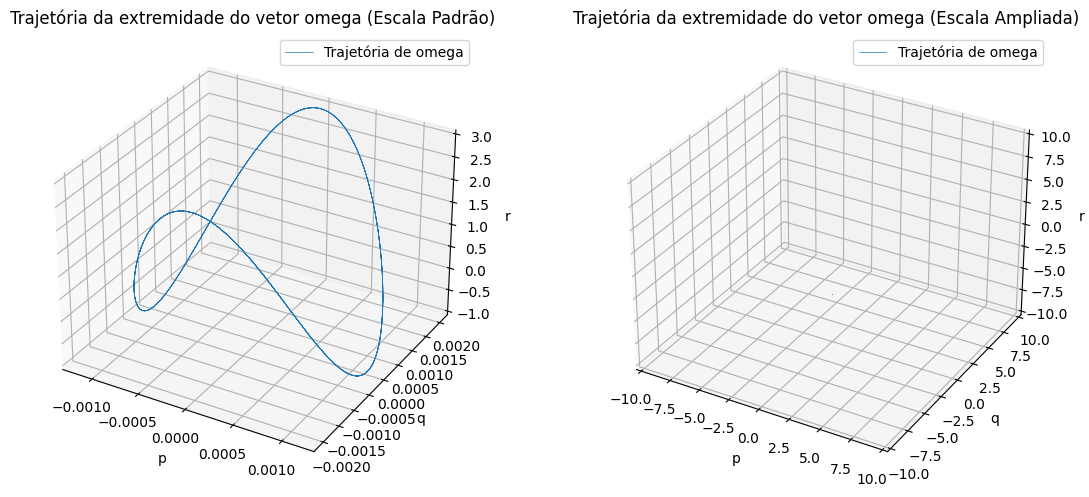

In [23]:
# Parâmetros iniciais
A = 3  # kgm*2
B = 2
C = 1

# Estados iniciais - Caso 4
p0 = 0.001
q0 = 0.001
r0 = 5

# Função que define as equações diferenciais
def corporigido(z, t):
    p, q, r = z

    dp_dt = ((B - C) * q * r) / A
    dq_dt = ((C - A) * p * r) / B
    dr_dt = ((A - B) * p * q) / C

    return [dp_dt, dq_dt, dr_dt]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
initial_conditions = [p0, q0, r0]

# Integração das equações diferenciais
sol = odeint(corporigido, initial_conditions, t)

# Extração das soluções
p = sol[:, 0]
q = sol[:, 1]
r = -sol[:, 2]  # Negativo devido à diferença de convenções entre Octave/MATLAB e Python

# Configuração do gráfico principal
fig = plt.figure(figsize=(12, 5))

# Gráfico 1: Escala padrão
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(p, q, r, label='Trajetória de omega', linewidth=0.5)
ax1.set_xlabel('p')
ax1.set_ylabel('q')
ax1.set_zlabel('r')
ax1.set_title('Trajetória da extremidade do vetor omega (Escala Padrão)')
ax1.legend()

# Gráfico 2: Escala ampliada
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(p, q, r, label='Trajetória de omega', linewidth=0.5)
ax2.set_xlabel('p')
ax2.set_ylabel('q')
ax2.set_zlabel('r')
ax2.set_title('Trajetória da extremidade do vetor omega (Escala Ampliada)')
ax2.legend()

# Ajuste de escala
ax2.set_xlim([-10, 10])
ax2.set_ylim([-10, 10])
ax2.set_zlim([-10, 10])

# Ajustar layout
plt.tight_layout()

# Exibição do gráfico
plt.show()

### d) Instabilidade

In [24]:
# Parâmetros iniciais
A = 3  # kgm*2
B = 2
C = 1

# Estados iniciais - Caso 4
p0 = 0.0000001
q0 = 5
r0 = 0.0000001

# Função que define as equações diferenciais
def corporigido(t, z):
    p, q, r = z

    dp_dt = ((B - C)*q*r)/A
    dq_dt = ((C - A)*p*r)/B
    dr_dt = ((A - B)*p*q)/C

    return [dp_dt, dq_dt, dr_dt]

# Tempo de simulação
t_span = [0, 20]

# Integração das equações diferenciais usando solve_ivp com RK45
sol = solve_ivp(corporigido, t_span, [p0, q0, r0], method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Criação do gráfico com Plotly Express
fig = px.line_3d(x=sol.y[0], y=sol.y[1], z=-sol.y[2], labels={'x': 'p', 'y': 'q', 'z': 'r'},
                 title='Trajetória da extremidade do vetor omega')

# Exibição do gráfico
fig.show()

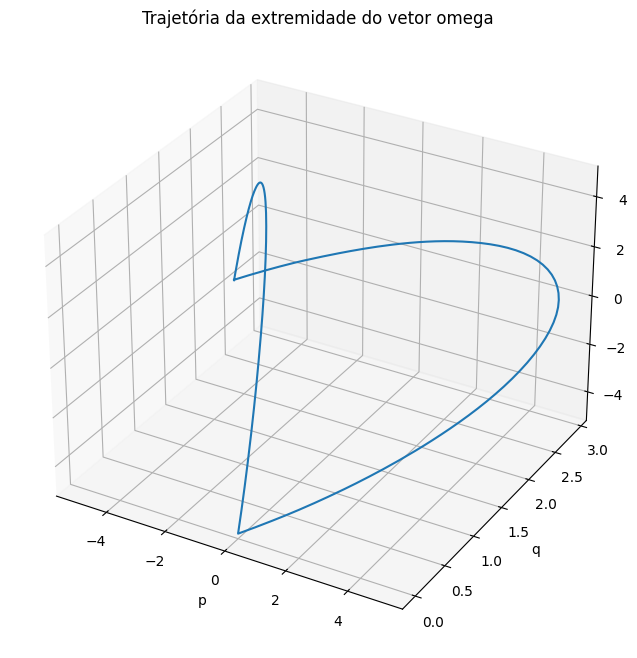

In [25]:
# Criação do gráfico 3D com matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotagem da trajetória
ax.plot(sol.y[2], sol.y[0], sol.y[1], label='Trajetória da extremidade do vetor omega')

# Configurações adicionais
ax.set_xlabel('p')
ax.set_ylabel('q')
ax.set_zlabel('r')
ax.set_title('Trajetória da extremidade do vetor omega')

# Ajuste da visão para um ângulo mais inclinado
# ax.view_init(elev=10, azim=50)

# Exibição do gráfico
plt.show()

## 4) Quarto Problema

O quarto problema é uma comparação entre as soluções numéricas e uma amostra analítica dos resultados. Novamente, serão apresentadas as funções elipticas de Jacobi para as soluções analíticas, e seus gráficos serão plotados, novamente, considerando um conjunto específico de condições iniciais para a integração.

### a) Simulação da Rotação

In [26]:
A = 3
B = 2
C = 1

p0 = 3
q0 = 1.5
r0 = 8

z0 = [p0, q0, r0]

solution = solve_ivp(angular_velocity, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 2000))

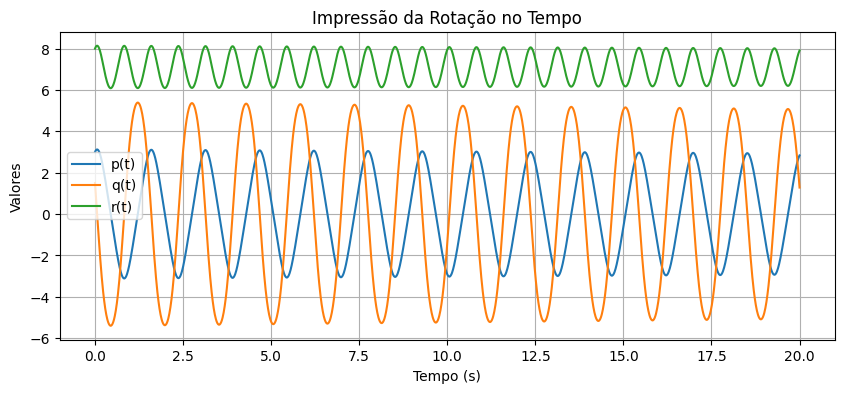

In [27]:
plt.figure(figsize=(10, 4))

plt.plot(solution.t, solution.y[0], label='p(t)')
plt.plot(solution.t, solution.y[1], label='q(t)')
plt.plot(solution.t, solution.y[2], label='r(t)')

plt.title(f'Impressão da Rotação no Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

### b) Demonstração da Inequação e Funções Elipticas de Jacobi

In [28]:
# Cálculo das grandezas auxiliares
haux = A * p0**2 + B * q0**2 + C * r0**2
laux = np.sqrt(A**2 * p0**2 + B**2 * q0**2 + C**2 * r0**2)
mu = haux / laux
D = haux / mu**2

f_2 = (mu**2)*((D*(D - C))/(B*(B-C)))
g_2 = (mu**2)*((D*(A - D))/(B*(A-B)))

### c) Conclusões Importantes

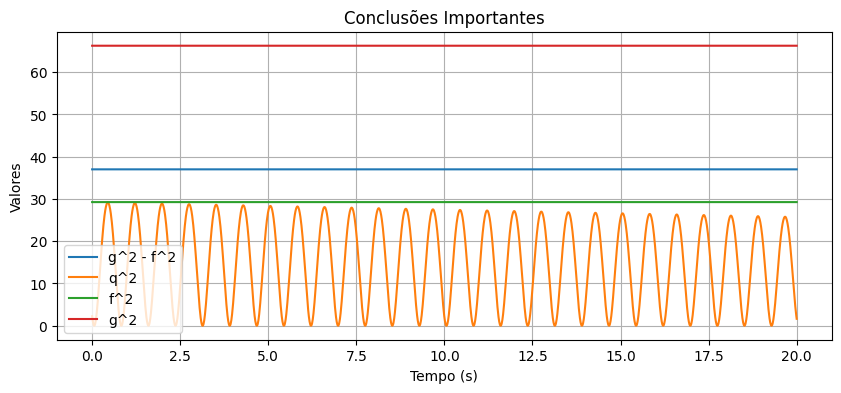

In [29]:
g_minus_f_2 = (D*(A - C)*(B - D))/(B*(B - C)*(A - B))*(mu**2)

plt.figure(figsize=(10, 4))

plt.plot(solution.t, np.full_like(solution.t, g_minus_f_2), label='g^2 - f^2')
plt.plot(solution.t, solution.y[1]**2, label='q^2')
plt.plot(solution.t, np.full_like(solution.t, f_2), label='f^2')
plt.plot(solution.t, np.full_like(solution.t, g_2), label='g^2')

plt.title('Conclusões Importantes')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

### d) Funções Elipticas de Jacobi

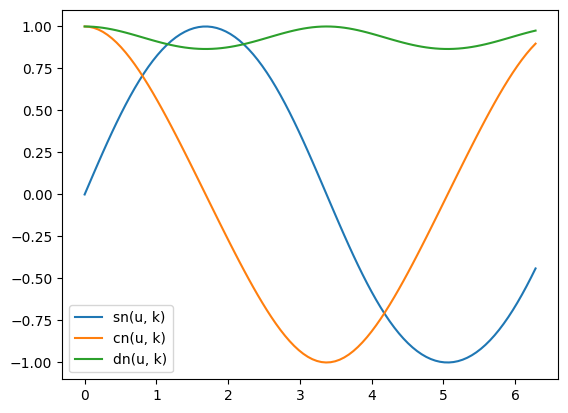

In [30]:
import numpy as np
from scipy.special import ellipj
import matplotlib.pyplot as plt

# Parâmetros da função elíptica
k = 0.5  # módulo da função elíptica
u = np.linspace(0, 2*np.pi, 100)  # vetor de valores de entrada

# Calcula a função elíptica
sn, cn, dn, _ = ellipj(u, k**2)

# Plota os resultados
plt.plot(u, sn, label='sn(u, k)')
plt.plot(u, cn, label='cn(u, k)')
plt.plot(u, dn, label='dn(u, k)')
plt.legend()
plt.show()


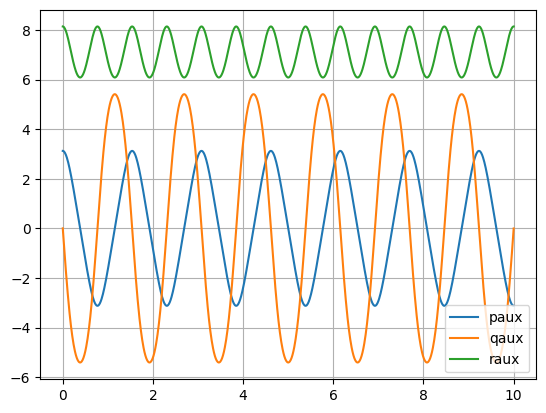

In [31]:
import numpy as np
from scipy.special import ellipj
import matplotlib.pyplot as plt

# Condições iniciais para a solução analítica
e1 = 1
e2 = -1
e3 = 1

# Cálculo das grandezas auxiliares
haux = A * p0**2 + B * q0**2 + C * r0**2
laux = np.sqrt(A**2 * p0**2 + B**2 * q0**2 + C**2 * r0**2)
mu = haux / laux
D = haux / mu**2

# Função ellipj para calcular as funções de Jacobi
if B > D:
    n = mu * np.sqrt(D * (A - D) * (B - C) / (A * B * C))
    k = np.sqrt((A - B) * (D - C) / ((B - C) * (A - D)))
    sn, cn, dn, _ = ellipj(n * t, k**2)
    paux = e1 * mu * np.sqrt(D * (D - C) / (A * (A - C))) * cn
    qaux = e2 * mu * np.sqrt(D * (D - C) / (B * (B - C))) * sn
    raux = e3 * mu * np.sqrt(D * (A - D) / (C * (A - C))) * dn
else:
    n = mu * np.sqrt(D * (D - C) * (B - C) / (A * B * C))
    k = 1 / np.sqrt((A - B) * (D - C) / ((B - C) * (A - D)))
    sn, cn, dn, _ = ellipj(n * t, k**2)
    paux = e1 * mu * np.sqrt(D * (D - C) / (A * (A - C))) * dn
    qaux = e2 * mu * np.sqrt(D * (A - D) / (B * (A - B))) * sn
    raux = e3 * mu * np.sqrt(D * (A - D) / (C * (A - C))) * cn

# Restante do seu código aqui...

# Exemplo de plot para verificar os resultados
plt.plot(t, paux, label='paux')
plt.plot(t, qaux, label='qaux')
plt.plot(t, raux, label='raux')
plt.legend()
plt.grid(True)
plt.show()

Agora, comparando rotação por rotação

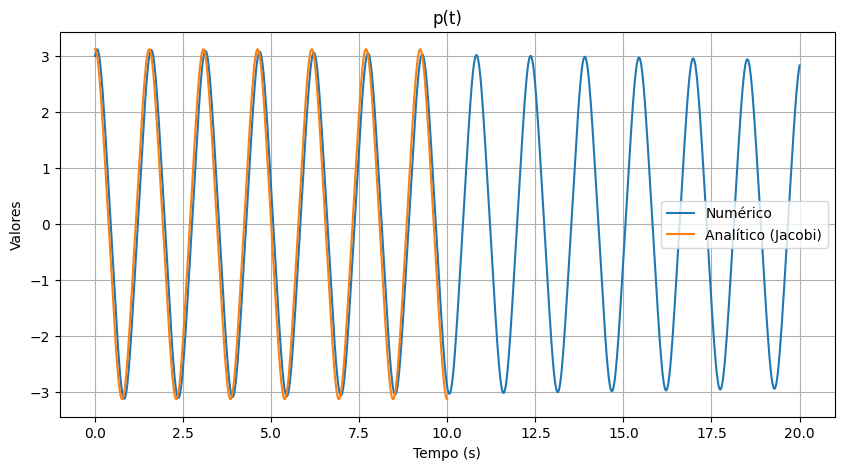

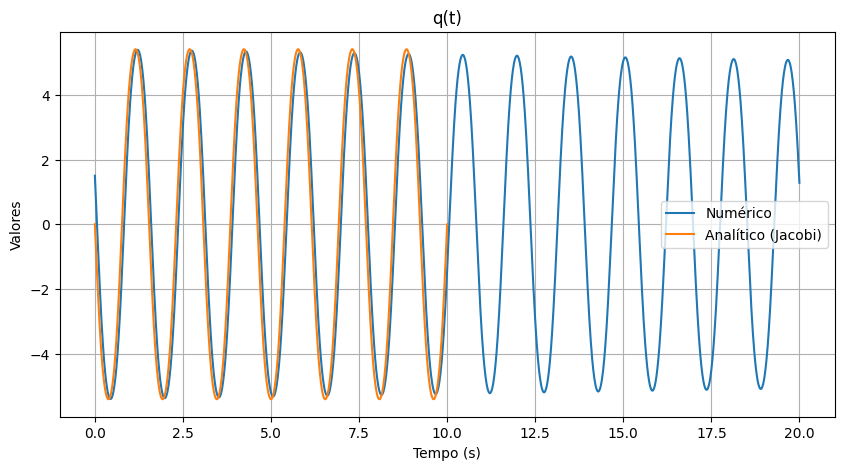

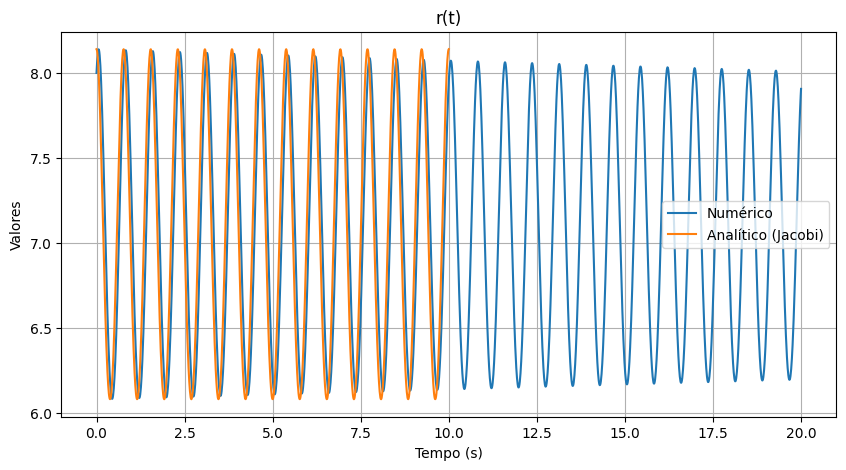

In [32]:
# Gráfico para p(t)
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[0], label='Numérico')
plt.plot(t, paux, label='Analítico (Jacobi)')
plt.title('p(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para q(t)
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[1], label='Numérico')
plt.plot(t, qaux, label='Analítico (Jacobi)')
plt.title('q(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico para r(t)
plt.figure(figsize=(10, 5))
plt.plot(solution.t, solution.y[2], label='Numérico')
plt.plot(t, raux, label='Analítico (Jacobi)')
plt.title('r(t)')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()


## 6) Modelo Lagrangeano



### a) Forma de Espaço de Estados


\begin{align*}
[y_1, y_2, y_3, y_4, y_5, y_6] &= [\theta, \dot{\theta}, \varphi, \dot{\varphi}, \psi, \dot{\psi}] \\
[\dot{y}_1, \dot{y}_2, \dot{y}_3, \dot{y}_4, \dot{y}_5, \dot{y}_6] &= [\dot{\theta}, \ddot{\theta}, \dot{\varphi}, \ddot{\varphi}, \dot{\psi}, \ddot{\psi}] \\
[\dot{y}_1, \dot{y}_2, \dot{y}_3, \dot{y}_4, \dot{y}_5, \dot{y}_6] &= [y_2, -\frac{\left(\alpha_{12} \alpha_{23}-\alpha_{13} \alpha_{22}\right) \gamma_3+\left(\alpha_{13} \alpha_{32}-\alpha_{12} \alpha_{33}\right) \gamma_2+\left(\alpha_{22} \alpha_{93}-\alpha_{23} \alpha_{32}\right) \gamma_1}{\left(\alpha_{11} \alpha_{22}-\alpha_{12} \alpha_{21}\right) \alpha_{33}+\left(\alpha_{13} \alpha_{21}-\alpha_{11} \alpha_{23}\right) \alpha_{32}+\left(\alpha_{12} \alpha_{23}-\alpha_{13} \alpha_{22}\right) \alpha_{31}}, \\
& y_4, \frac{\left(\alpha_{11} \alpha_{23}-\alpha_{13} \alpha_{21}\right) \gamma_3+\left(\alpha_{13} \alpha_{31}-\alpha_{11} \alpha_{33}\right) \gamma_2+\left(\alpha_{21} \alpha_{33}-\alpha_{23} \alpha_{31}\right) \gamma_1}{\left(\alpha_{11} \alpha_{22}-\alpha_{12} \alpha_{21}\right) \alpha_{33}+\left(\alpha_{13} \alpha_{21}-\alpha_{11} \alpha_{23}\right) \alpha_{32}+\left(\alpha_{12} \alpha_{23}-\alpha_{13} \alpha_{22}\right) \alpha_{31}}, \\
& y_6, -\frac{\left(\alpha_{11} \alpha_{22}-\alpha_{12} \alpha_{21}\right) \gamma_3+\left(\alpha_{12} \alpha_{31}-\alpha_{11} \alpha_{32}\right) \gamma_2+\left(\alpha_{21} \alpha_{32}-\alpha_{22} \alpha_{31}\right) \gamma_1}{\left(\alpha_{11} \alpha_{22}-\alpha_{12} \alpha_{21}\right) \alpha_{33}+\left(\alpha_{13} \alpha_{21}-\alpha_{11} \alpha_{23}\right) \alpha_{22}+\left(\alpha_{12} \alpha_{23}-\alpha_{13} \alpha_{22}\right) \alpha_{31}}]
\end{align*}


### b) Simulações do Modelo

#### Caso A: A = B = C = 3

In [67]:
import numpy as np
from scipy.integrate import odeint

def derivada(y, t):

    a = np.zeros((3, 3))
    a[0, 0] = (A - B) * (np.sin(y[2]) * np.sin(y[4]))**2 + B * (np.sin(y[2]))**2 + C * (np.cos(y[2]))**2
    a[0, 1] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[0, 2] = C * np.cos(y[2])
    a[1, 0] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[1, 1] = B + (A - B) * (np.cos(y[4]))**2
    a[1, 2] = 0
    a[2, 0] = C * np.cos(y[2])
    a[2, 1] = 0
    a[2, 2] = C

    g = np.zeros(3)
    g[0] = ((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])) * y[1] * y[3] + \
           (A - B) * (np.sin(y[2]))**2 * np.sin(2 * y[4]) * y[1] * y[5] + (A - B) / 2 * np.cos(y[2]) * np.sin(2 * y[4]) * y[3]**2 + \
           (((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) - C * np.sin(y[2])) * y[3] * y[5])

    g[1] = np.where(np.abs((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])) < 1e-10,
                    0, -y[1]**2 / (2 * ((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])))) + \
           y[1] * y[5] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) - \
           y[3] * y[5] * (A - B) * np.sin(2 * y[4])

    g[2] = np.where(np.abs((A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2) < 1e-10,
                    0, -y[1]**2 / (2 * (A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2)) - \
           y[1] * y[3] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) + \
           (A - B) / 2 * np.sin(2 * y[4]) * y[3]**2

    M = -np.linalg.inv(a).dot(g)

    dy = np.zeros(6)
    dy[0] = y[1]
    dy[1] = M[0]
    dy[2] = y[3]
    dy[3] = M[1]
    dy[4] = y[5]
    dy[5] = M[2]

    return dy

A = 3
B = 3
C = 3

w0 = [0, 2 * np.pi, np.pi / 4, 2 * np.pi, 0, 20 * np.pi]
t0, tf, h = 0, 1, 0.001
t = np.linspace(t0, tf, int((tf - t0) / h))

sol = odeint(derivada, w0, t)

psi, psi_p, theta, theta_p, phi, phi_p = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4], sol[:, 5]

<ipython-input-67-2ebd57cb3615>:23: RuntimeWarning:

divide by zero encountered in double_scalars

<ipython-input-67-2ebd57cb3615>:28: RuntimeWarning:

divide by zero encountered in double_scalars



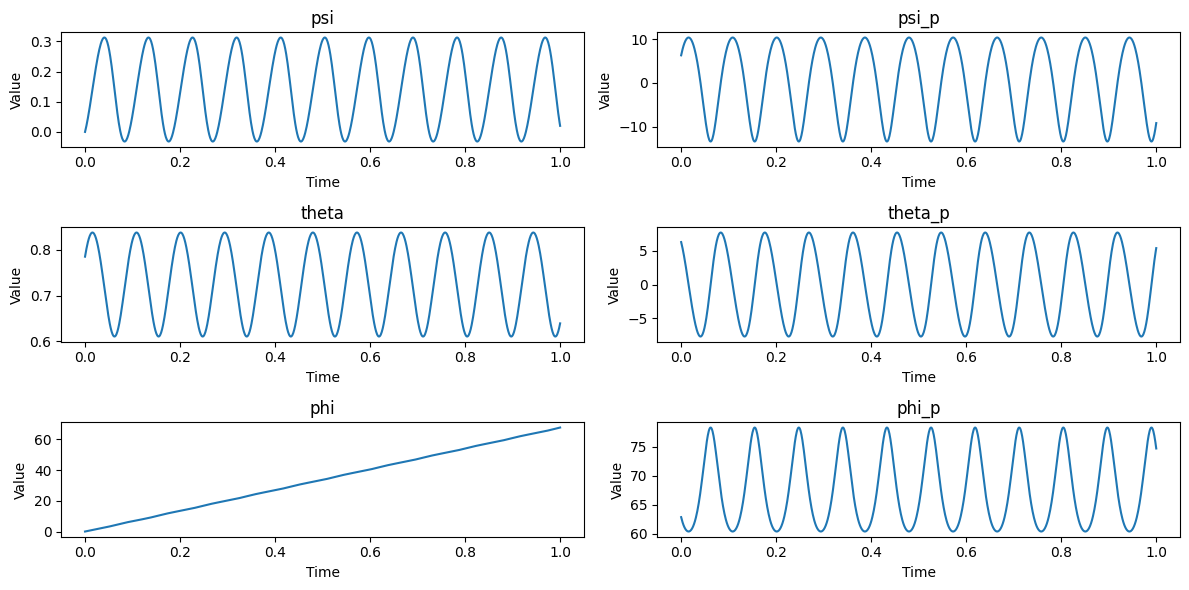

In [68]:
import matplotlib.pyplot as plt

# Plotting psi
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(t, psi, label='psi')
plt.title('psi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting psi_p
plt.subplot(3, 2, 2)
plt.plot(t, psi_p, label='psi_p')
plt.title('psi_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta
plt.subplot(3, 2, 3)
plt.plot(t, theta, label='theta')
plt.title('theta')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta_p
plt.subplot(3, 2, 4)
plt.plot(t, theta_p, label='theta_p')
plt.title('theta_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi
plt.subplot(3, 2, 5)
plt.plot(t, phi, label='phi')
plt.title('phi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi_p
plt.subplot(3, 2, 6)
plt.plot(t, phi_p, label='phi_p')
plt.title('phi_p')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


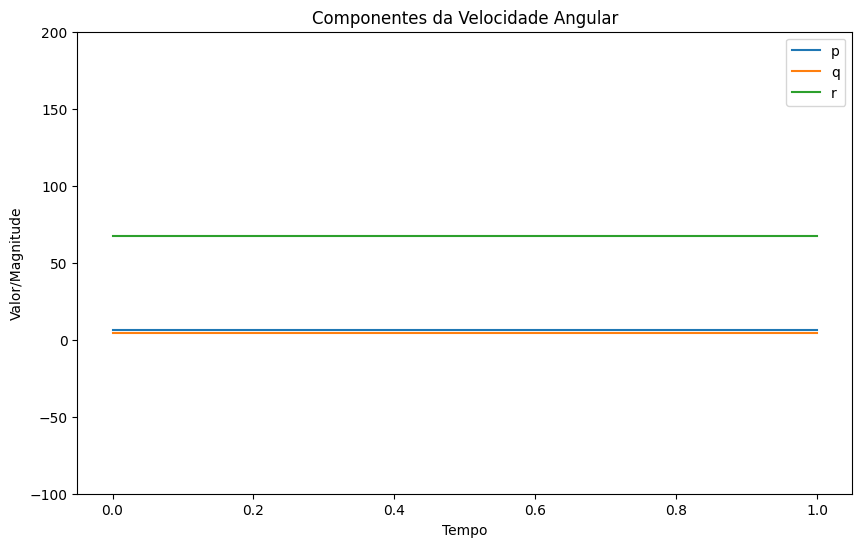

In [69]:
h0 = (tf - t0) / h

ho = int(ho)

# Componente x da velocidade angular
p = np.zeros(ho)
for i in range(ho):
    p[i] = psi_p[i] * np.sin(theta[i]) * np.sin(phi[i]) + theta_p[i] * np.cos(phi[i])

# Componente y da velocidade angular
q = np.zeros(ho)
for i in range(ho):
    q[i] = psi_p[i] * np.sin(theta[i]) * np.cos(phi[i]) - theta_p[i] * np.sin(phi[i])

# Componente z da velocidade angular
r = np.zeros(ho)
for i in range(ho):
    r[i] = psi_p[i] * np.cos(theta[i]) + phi_p[i]

# Módulo do vetor rotação do corpo
omega = np.zeros(ho)
for i in range(ho):
    omega[i] = np.sqrt(p[i]**2 + q[i]**2 + r[i]**2)

import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(10, 6))

# Plotting components of the angular velocity vector

# Componente x da velocidade angular (p)
plt.plot(t, p, label='p')

# Componente y da velocidade angular (q)
plt.plot(t, q, label='q')

# Componente z da velocidade angular (r)
plt.plot(t, r, label='r')

# Set titles and labels
plt.title('Componentes da Velocidade Angular')
plt.xlabel('Tempo')
plt.ylabel('Valor/Magnitude')
plt.legend()

# Adjust the y-axis limits as needed
plt.ylim(-100, 200)

plt.show()


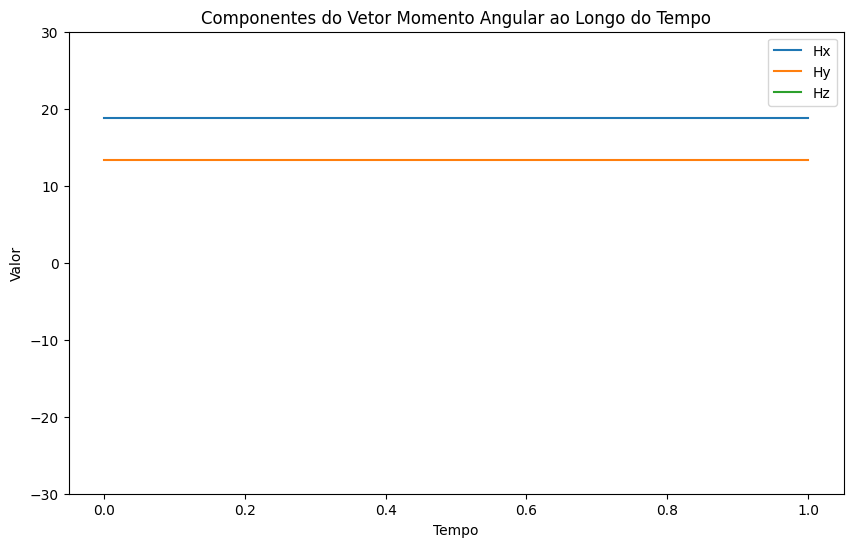

In [70]:
# Angular momentum vector components
Hx = A * (psi_p * np.sin(theta) * np.sin(phi) + theta_p * np.cos(phi))
Hy = B * (psi_p * np.sin(theta) * np.cos(phi) - theta_p * np.sin(phi))
Hz = C * (psi_p * np.cos(theta) + phi_p)

# Create a single figure for all subplots
plt.figure(figsize=(10, 6))

# Plotting coordinates of the angular momentum vector over time

# Componente x do momento angular (Hx)
plt.plot(t, Hx, label='Hx')

# Componente y do momento angular (Hy)
plt.plot(t, Hy, label='Hy')

# Componente z do momento angular (Hz)
plt.plot(t, Hz, label='Hz')

# Set titles and labels
plt.title('Componentes do Vetor Momento Angular ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()

# Set y-axis limits
plt.ylim(-30, 30)

# Show the plot
plt.show()

### Caso B: A = B != C

In [71]:
import numpy as np
from scipy.integrate import odeint

def derivada(y, t):

    a = np.zeros((3, 3))
    a[0, 0] = (A - B) * (np.sin(y[2]) * np.sin(y[4]))**2 + B * (np.sin(y[2]))**2 + C * (np.cos(y[2]))**2
    a[0, 1] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[0, 2] = C * np.cos(y[2])
    a[1, 0] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[1, 1] = B + (A - B) * (np.cos(y[4]))**2
    a[1, 2] = 0
    a[2, 0] = C * np.cos(y[2])
    a[2, 1] = 0
    a[2, 2] = C

    g = np.zeros(3)
    g[0] = ((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])) * y[1] * y[3] + \
           (A - B) * (np.sin(y[2]))**2 * np.sin(2 * y[4]) * y[1] * y[5] + (A - B) / 2 * np.cos(y[2]) * np.sin(2 * y[4]) * y[3]**2 + \
           (((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) - C * np.sin(y[2])) * y[3] * y[5])

    g[1] = np.where(np.abs((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])) < 1e-10,
                    0, -y[1]**2 / (2 * ((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])))) + \
           y[1] * y[5] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) - \
           y[3] * y[5] * (A - B) * np.sin(2 * y[4])

    g[2] = np.where(np.abs((A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2) < 1e-10,
                    0, -y[1]**2 / (2 * (A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2)) - \
           y[1] * y[3] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) + \
           (A - B) / 2 * np.sin(2 * y[4]) * y[3]**2

    M = -np.linalg.inv(a).dot(g)

    dy = np.zeros(6)
    dy[0] = y[1]
    dy[1] = M[0]
    dy[2] = y[3]
    dy[3] = M[1]
    dy[4] = y[5]
    dy[5] = M[2]

    return dy

A = 3
B = 3
C = 6

w0 = [0, 2 * np.pi, np.pi / 4, 2 * np.pi, 0, 20 * np.pi]
t0, tf, h = 0, 1, 0.001
t = np.linspace(t0, tf, int((tf - t0) / h))

sol = odeint(derivada, w0, t)

psi, psi_p, theta, theta_p, phi, phi_p = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4], sol[:, 5]

<ipython-input-71-77e08e3614b1>:28: RuntimeWarning:

divide by zero encountered in double_scalars



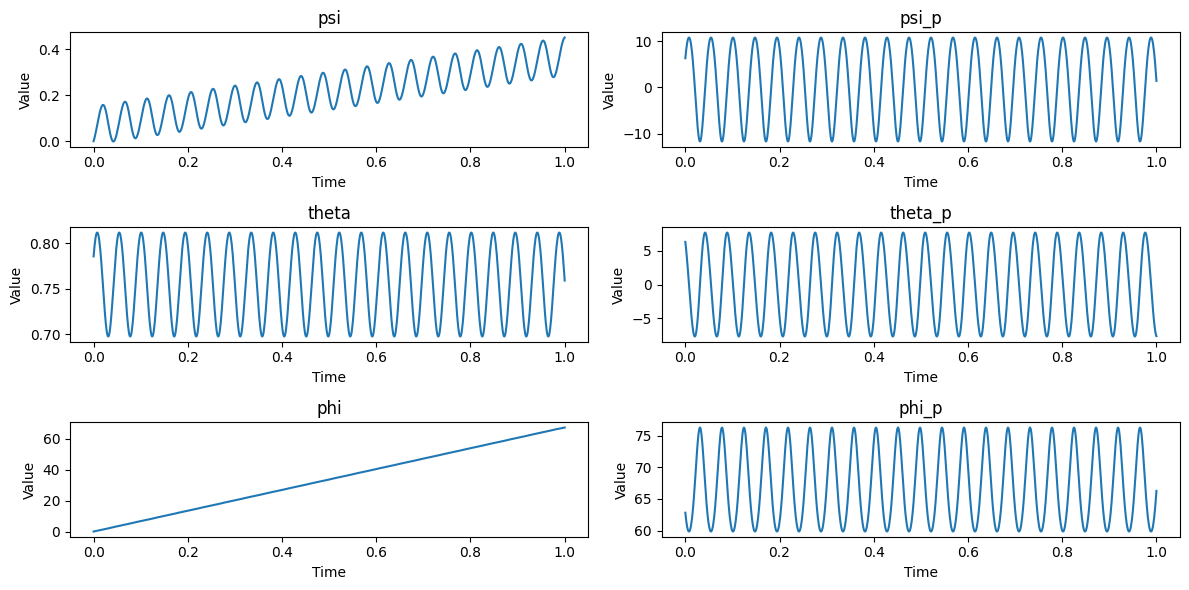

In [72]:
import matplotlib.pyplot as plt

# Plotting psi
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(t, psi, label='psi')
plt.title('psi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting psi_p
plt.subplot(3, 2, 2)
plt.plot(t, psi_p, label='psi_p')
plt.title('psi_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta
plt.subplot(3, 2, 3)
plt.plot(t, theta, label='theta')
plt.title('theta')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta_p
plt.subplot(3, 2, 4)
plt.plot(t, theta_p, label='theta_p')
plt.title('theta_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi
plt.subplot(3, 2, 5)
plt.plot(t, phi, label='phi')
plt.title('phi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi_p
plt.subplot(3, 2, 6)
plt.plot(t, phi_p, label='phi_p')
plt.title('phi_p')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


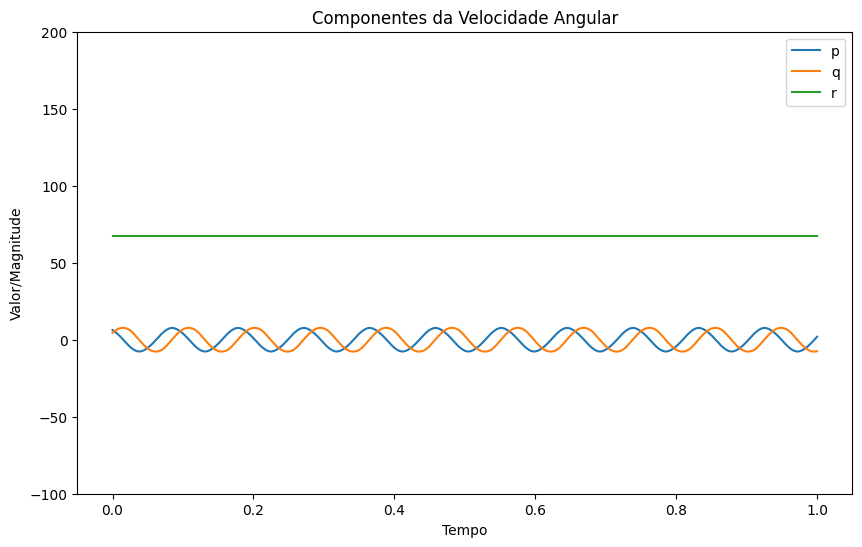

In [73]:
h0 = (tf - t0) / h

ho = int(ho)

# Componente x da velocidade angular
p = np.zeros(ho)
for i in range(ho):
    p[i] = psi_p[i] * np.sin(theta[i]) * np.sin(phi[i]) + theta_p[i] * np.cos(phi[i])

# Componente y da velocidade angular
q = np.zeros(ho)
for i in range(ho):
    q[i] = psi_p[i] * np.sin(theta[i]) * np.cos(phi[i]) - theta_p[i] * np.sin(phi[i])

# Componente z da velocidade angular
r = np.zeros(ho)
for i in range(ho):
    r[i] = psi_p[i] * np.cos(theta[i]) + phi_p[i]

# Módulo do vetor rotação do corpo
omega = np.zeros(ho)
for i in range(ho):
    omega[i] = np.sqrt(p[i]**2 + q[i]**2 + r[i]**2)

import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(10, 6))

# Plotting components of the angular velocity vector

# Componente x da velocidade angular (p)
plt.plot(t, p, label='p')

# Componente y da velocidade angular (q)
plt.plot(t, q, label='q')

# Componente z da velocidade angular (r)
plt.plot(t, r, label='r')

# Set titles and labels
plt.title('Componentes da Velocidade Angular')
plt.xlabel('Tempo')
plt.ylabel('Valor/Magnitude')
plt.legend()

# Adjust the y-axis limits as needed
plt.ylim(-100, 200)

plt.show()


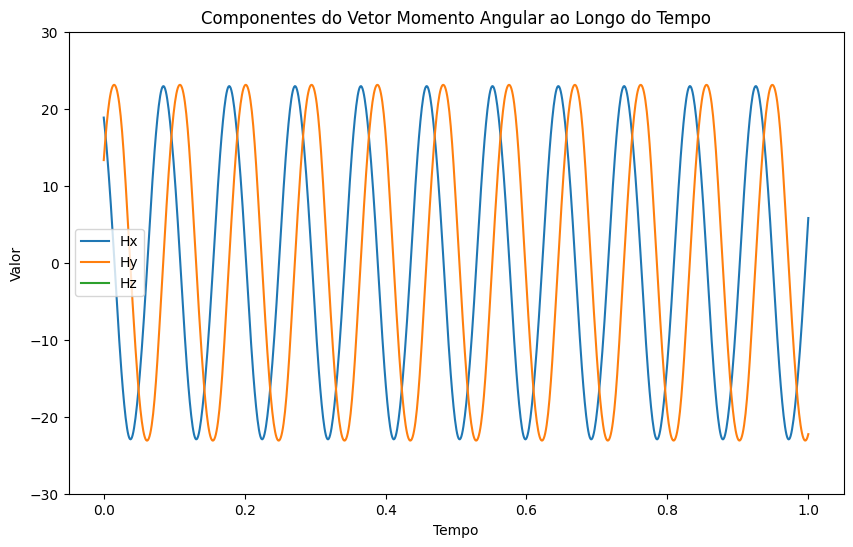

In [74]:
# Angular momentum vector components
Hx = A * (psi_p * np.sin(theta) * np.sin(phi) + theta_p * np.cos(phi))
Hy = B * (psi_p * np.sin(theta) * np.cos(phi) - theta_p * np.sin(phi))
Hz = C * (psi_p * np.cos(theta) + phi_p)

# Create a single figure for all subplots
plt.figure(figsize=(10, 6))

# Plotting coordinates of the angular momentum vector over time

# Componente x do momento angular (Hx)
plt.plot(t, Hx, label='Hx')

# Componente y do momento angular (Hy)
plt.plot(t, Hy, label='Hy')

# Componente z do momento angular (Hz)
plt.plot(t, Hz, label='Hz')

# Set titles and labels
plt.title('Componentes do Vetor Momento Angular ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()

# Set y-axis limits
plt.ylim(-30, 30)

# Show the plot
plt.show()

### Caso 3: A = 3, B = 2, C = 1

In [93]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def derivada(t, y, A, B, C):
    a = np.zeros((3, 3))
    a[0, 0] = (A - B) * (np.sin(y[2]) * np.sin(y[4]))**2 + B * (np.sin(y[2]))**2 + C * (np.cos(y[2]))**2
    a[0, 1] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[0, 2] = C * np.cos(y[2])
    a[1, 0] = (A - B) / 2 * np.sin(y[2]) * np.sin(2 * y[4])
    a[1, 1] = B + (A - B) * (np.cos(y[4]))**2
    a[1, 2] = 0
    a[2, 0] = C * np.cos(y[2])
    a[2, 1] = 0
    a[2, 2] = C

    g = np.zeros(3)

    small_denominator_1 = np.abs((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])) < 1e-10
    small_denominator_2 = np.abs((A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2) < 1e-10

    g[1] = np.where(small_denominator_1,
                    0, -y[1]**2 / (2 * ((A - B) * np.sin(2 * y[2]) * (np.sin(y[4]))**2 + (B - C) * np.sin(2 * y[2])))) + \
           y[1] * y[5] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) - \
           y[3] * y[5] * (A - B) * np.sin(2 * y[4])

    g[2] = np.where(small_denominator_2,
                    0, -y[1]**2 / (2 * (A - B) * np.sin(2 * y[4]) * (np.sin(y[2]))**2)) - \
           y[1] * y[3] * ((A - B) * np.sin(y[2]) * np.cos(2 * y[4]) + C * np.sin(y[2])) + \
           (A - B) / 2 * np.sin(2 * y[4]) * y[3]**2

    M = -np.linalg.inv(a).dot(g)

    dy = np.zeros(6)
    dy[0] = y[1]
    dy[1] = M[0]
    dy[2] = y[3]
    dy[3] = M[1]
    dy[4] = y[5]
    dy[5] = M[2]

    return dy

A = 3
B = 2
C = 1

w0 = [0, 2 * np.pi, np.pi / 4, 2 * np.pi, 0, 20 * np.pi]
t_span = [0, 1]
h = 0.001
t_eval = np.arange(t_span[0], t_span[1] + h, h)

sol = solve_ivp(lambda t, y: derivada(t, y, A, B, C), t_span, w0, t_eval=t_eval, atol=1e-8, rtol=1e-6)

psi, psi_p, theta, theta_p, phi, phi_p = sol.y[0], sol.y[1], sol.y[2], sol.y[3], sol.y[4], sol.y[5]
t = sol.t

# Plot the results as needed


<ipython-input-93-81affdb4b976>:28: RuntimeWarning:

divide by zero encountered in double_scalars



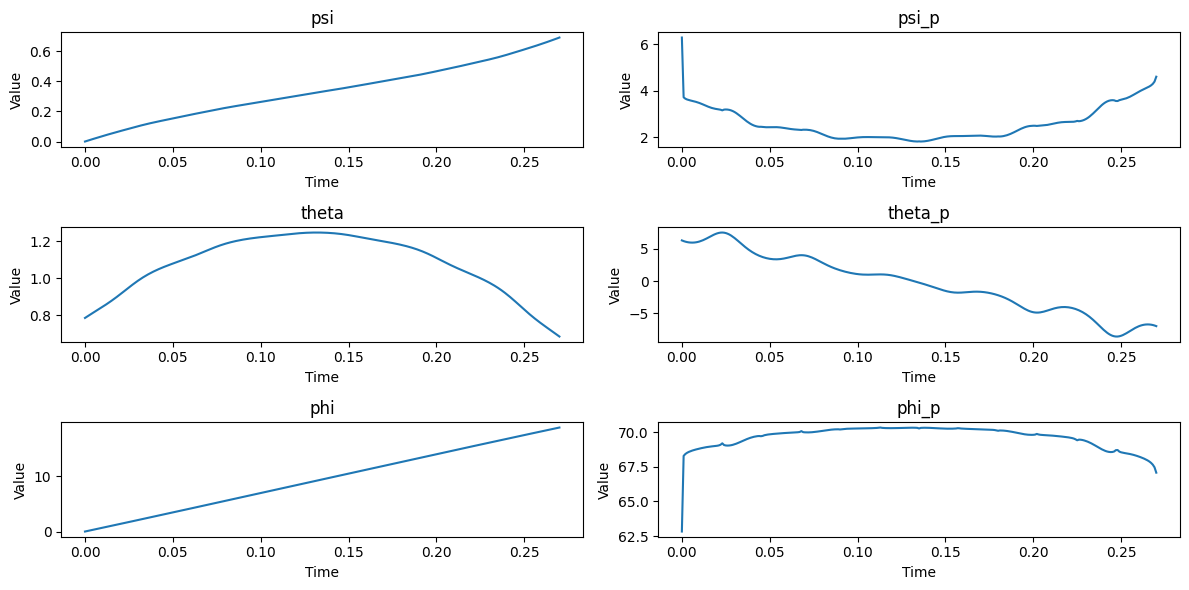

In [94]:
import matplotlib.pyplot as plt

# Plotting psi
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.plot(t, psi, label='psi')
plt.title('psi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting psi_p
plt.subplot(3, 2, 2)
plt.plot(t, psi_p, label='psi_p')
plt.title('psi_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta
plt.subplot(3, 2, 3)
plt.plot(t, theta, label='theta')
plt.title('theta')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting theta_p
plt.subplot(3, 2, 4)
plt.plot(t, theta_p, label='theta_p')
plt.title('theta_p')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi
plt.subplot(3, 2, 5)
plt.plot(t, phi, label='phi')
plt.title('phi')
plt.xlabel('Time')
plt.ylabel('Value')

# Plotting phi_p
plt.subplot(3, 2, 6)
plt.plot(t, phi_p, label='phi_p')
plt.title('phi_p')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


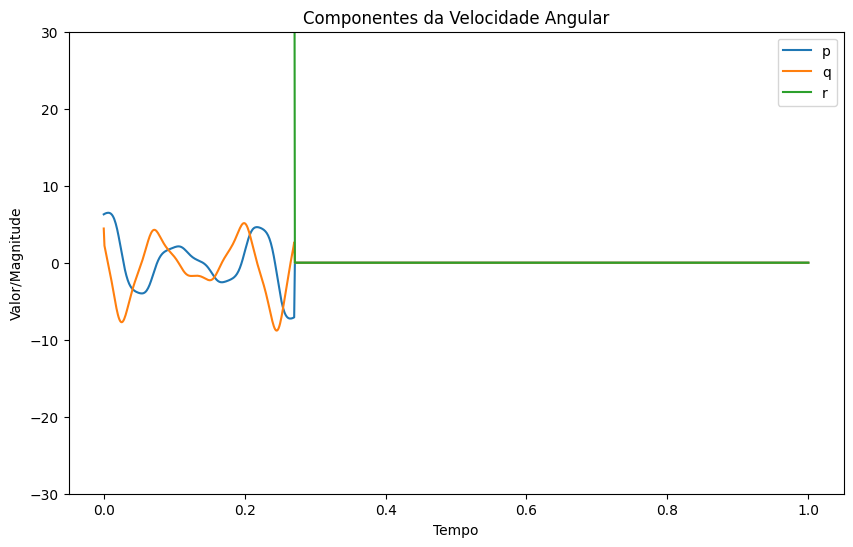

In [97]:
# Assuming t is obtained from linspace with ho as the number of points
t = np.linspace(t0, tf, ho)

# Create a single figure
plt.figure(figsize=(10, 6))

# Plotting components of the angular velocity vector

# Componente x da velocidade angular (p)
plt.plot(t, p, label='p')

# Componente y da velocidade angular (q)
plt.plot(t, q, label='q')

# Componente z da velocidade angular (r)
plt.plot(t, r, label='r')

# Set titles and labels
plt.title('Componentes da Velocidade Angular')
plt.xlabel('Tempo')
plt.ylabel('Valor/Magnitude')
plt.legend()

# Adjust the y-axis limits as needed
plt.ylim(-30, 30)

plt.show()

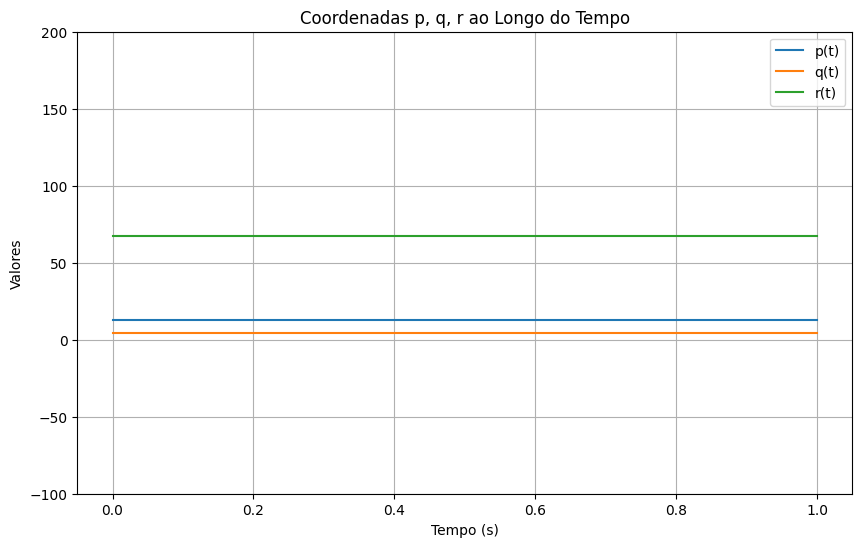

In [85]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

A = B = C = 3

def angular_velocity(t, z):
    p, q, r = z

    dp_dt = ((B - C) * q * r) / A
    dq_dt = ((C - A) * p * r) / B
    dr_dt = ((A - B) * p * q) / C

    return [dp_dt, dq_dt, dr_dt]

z0 = [12.57, 4.44, 67.27]
t_span = [0, 1]

# Solving the ODE
sol = solve_ivp(angular_velocity, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plotting the coordinates p, q, r in overlay on the same graph
plt.figure(figsize=(10, 6))

plt.plot(sol.t, sol.y[0], label='p(t)')
plt.plot(sol.t, sol.y[1], label='q(t)')
plt.plot(sol.t, sol.y[2], label='r(t)')

plt.title('Coordenadas p, q, r ao Longo do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.ylim(-100, 200)  # Adjust the y-axis limits
plt.grid(True)
plt.show()
